cek evaluasi clustering pake dbi sama silhouette

Digunakan utk seberapa baik suatu data terkelompokkan

DBI(Davies Bouldin Index)
1. SSW
2. SSB
3. Rasio
4. DBI           

In [1]:
# import library
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

from itertools import product

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# generate data
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

In [3]:
# eda
# menampilkan 5 data teratas 
# X adalah data yg membentuk circle
print('Nilai X : \n', X[:5])

# y adalah cluster dari data tersebut
print('\nCluster : \n', y[:5])

Nilai X : 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]

Cluster : 
 [0 1 1 1 1]


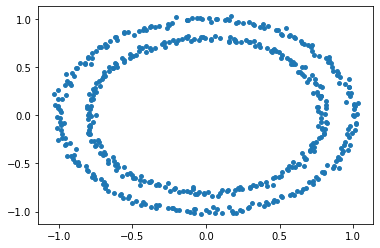

In [4]:
# visualisasi
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

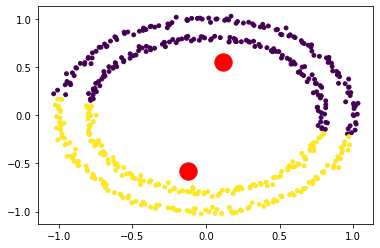

In [ ]:
kmeans_cluster = KMeans(n_clusters=2, init="k-means++",max_iter=300, 
                   n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0], 
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='red')

plt.show()

DBSCAN

In [ ]:
# create eps & min_samples combination
eps_values = np.arange(0.02,0.3,0.01)
min_samples = np.arange(2,5)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = [] #list jumlah cluster
epsvalues = [] 
min_samp=[]

for p in dbscan_params:
    dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

    if len(np.unique(dbscan_cluster.labels_)) <= 1 :
      break
    else:
      no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
    
    # append values to list
    epsvalues.append(p[0])
    min_samp.append(p[1])


In [ ]:
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters', 'epsilon_values', 'minimum poin'])
eps_min_df

,no_of_clusters,epsilon_values,minimum poin
0,99,0.02,2
1,23,0.02,3
2,2,0.02,4
3,141,0.03,2
4,64,0.03,3
5,16,0.03,4
6,110,0.04,2
7,84,0.04,3
8,58,0.04,4
9,57,0.05,2


In [ ]:
eps_min_df[eps_min_df['no_of_clusters'] == 2]

,no_of_clusters,epsilon_values,minimum poin
2,2,0.02,4
18,2,0.08,2
19,2,0.08,3
20,2,0.08,4
21,2,0.09,2
22,2,0.09,3
23,2,0.09,4
24,2,0.10,2
25,2,0.10,3
26,2,0.10,4


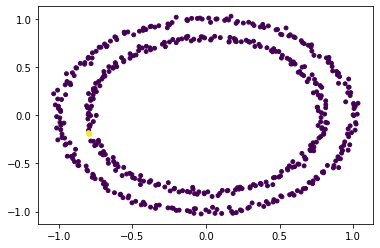

In [ ]:
dbscan_cluster = DBSCAN(eps=0.02, min_samples=4)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

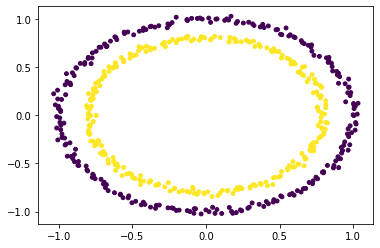

In [ ]:
dbscan_cluster = DBSCAN(eps=0.08, min_samples=2)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

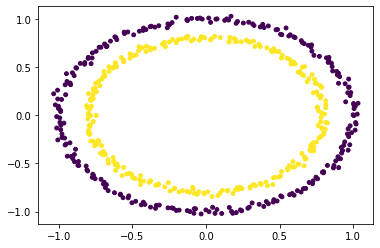

In [ ]:
dbscan_cluster = DBSCAN(eps=0.08, min_samples=3)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

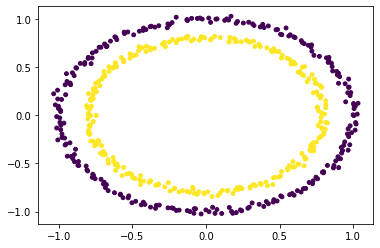

In [ ]:
dbscan_cluster = DBSCAN(eps=0.09, min_samples=4)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

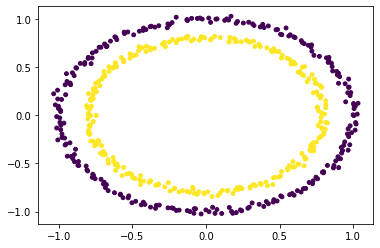

In [ ]:
dbscan_cluster = DBSCAN(eps=0.10, min_samples=4)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

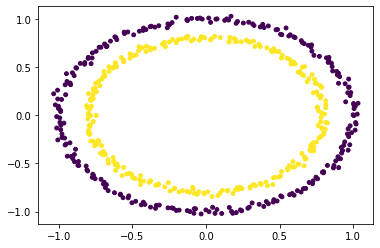

In [ ]:
dbscan_cluster = DBSCAN(eps=0.11, min_samples=3)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

In [ ]:
# evaluasi pakai dbi
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  1.1413660912854755
DBI DBSCAN Score :  690.8008186438688


Bagus KMeans karena mendekati 0

In [ ]:
# cari nilai silhoutte score
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score : ', sil_kmeans)
print('Silhouette Score DBSCAN Score : ', sil_dbscan)

Silhouette Score KMeans Score :  0.4009108760935593
Silhouette Score DBSCAN Score :  0.0183945519188842


Bagus KMeans krn mendekati 1

In [ ]:
# generate data
X, y = datasets.make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=0)

In [ ]:
# eda
# menampilkan 5 data teratas 
# X adalah data yg membentuk circle
print('Nilai X : \n', X[:5])

# y adalah cluster dari data tersebut
print('\nCluster : \n', y[:5])

Nilai X : 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]

Cluster : 
 [1 1 0 0 1]


**KMEANS**

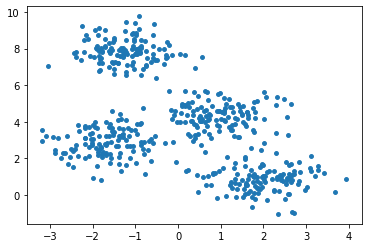

In [ ]:
# visualisasi
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

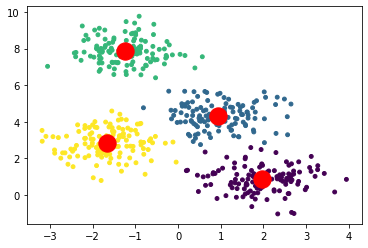

In [ ]:
kmeans_cluster = KMeans(n_clusters=4, init="k-means++",max_iter=300, 
                   n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:,0], 
            kmeans_cluster.cluster_centers_[:,1],
            s=300, c='red')

plt.show()

**DBSCAN**

In [ ]:
# create eps & min_samples combination
eps_values = np.arange(0.1,10,0.1)
min_samples = np.arange(1,10)
dbscan_params = list(product(eps_values, min_samples))

In [ ]:
no_of_clusters = [] #list jumlah cluster
epsvalues = [] 
min_samp=[]

for p in dbscan_params:
    dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)

    if len(np.unique(dbscan_cluster.labels_)) <= 1 :
      pass
    else:
      no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
    
    # append values to list
    epsvalues.append(p[0])
    min_samp.append(p[1])

In [ ]:
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters', 'epsilon_values', 'minimum poin'])
eps_min_df

,no_of_clusters,epsilon_values,minimum poin
0,360,0.1,1
1,81,0.1,2
2,29,0.1,3
3,15,0.1,4
4,6,0.1,5
...,...,...,...
63,2,0.8,1
64,2,0.8,2
65,2,0.8,3
66,3,0.8,4


In [ ]:
eps_min_df[eps_min_df['no_of_clusters'] == 4]

,no_of_clusters,epsilon_values,minimum poin
43,4,0.5,8
45,4,0.6,1
46,4,0.6,2
47,4,0.6,3
48,4,0.6,4
49,4,0.6,5
51,4,0.6,7
52,4,0.6,8
58,4,0.7,5


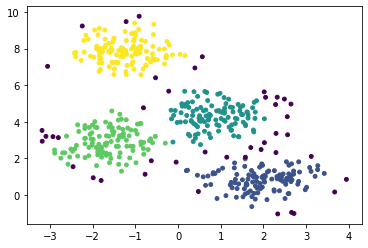

In [ ]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=8)
dbscan_cluster.fit(X)

dbscan_result= dbscan_cluster.labels_
plt.scatter(X[:,0],X[:,1], s=15, c=dbscan_result)
plt.show()

In [ ]:
# evaluasi pakai dbi
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)

print('DBI KMeans Score : ', dbi_kmeans)
print('DBI DBSCAN Score : ', dbi_dbscan)

DBI KMeans Score :  0.5120623635610269
DBI DBSCAN Score :  2.5944282875286215


Bagus pakai KMeans

In [ ]:
# cari nilai silhoutte score
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)

print('Silhouette Score KMeans Score : ', sil_kmeans)
print('Silhouette Score DBSCAN Score : ', sil_dbscan)

Silhouette Score KMeans Score :  0.6322199807775134
Silhouette Score DBSCAN Score :  0.5577401008021559


Bagus pakai DBSCAN